In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [3]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

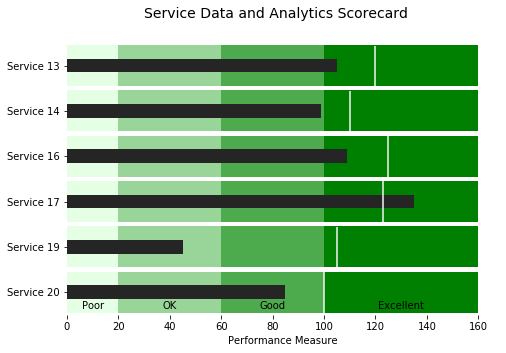

In [7]:
data_to_plot2 = [("Service 13", 105, 120),
                 ("Service 14", 99, 110),
                 ("Service 16", 109, 125),
                 ("Service 17", 135, 123),
                 ("Service 19", 45, 105),
                 ("Service 20", 85, 100)]

bulletgraph(data_to_plot2, limits=[20, 60, 100, 160],
            labels=["Poor", "OK", "Good", "Excellent"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Service Data and Analytics Scorecard")